In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006


def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    # plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
))
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

/home/liyang22/tensorflow-py3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/liyang22/tensorflow-py3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/liyang22/tensorflow-py3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=20, stateful=True, return_sequences=True, batch_input_shape=(50, 20, 1...)`


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (50, 20, 20)              1760      
_________________________________________________________________
time_distributed_1 (TimeDist (50, 20, 1)               21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


Training ------------


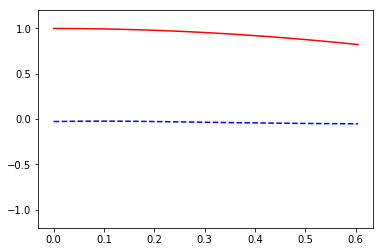

train cost:  0.5094064


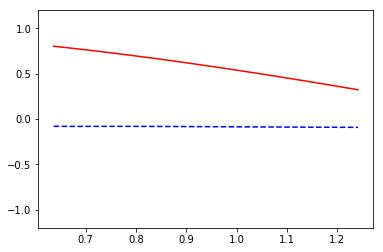

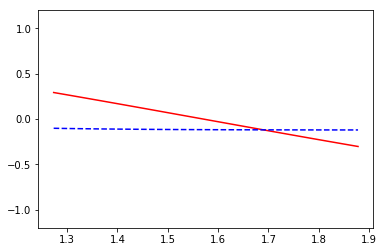

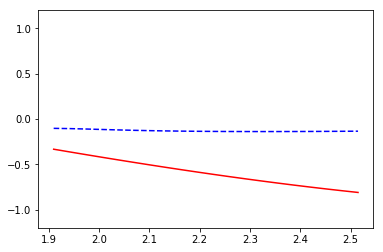

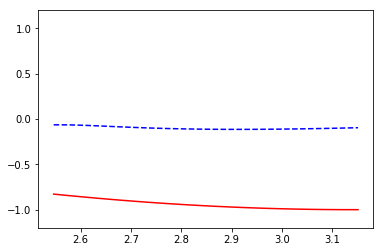

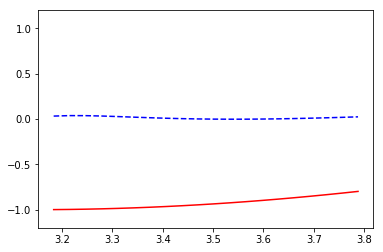

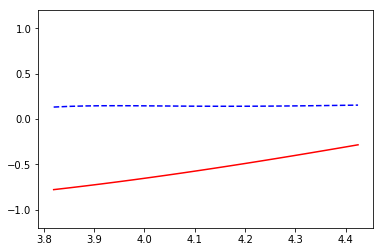

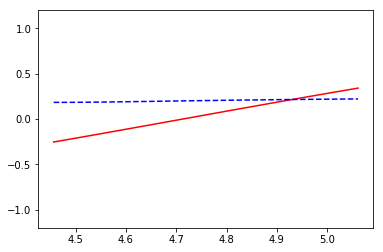

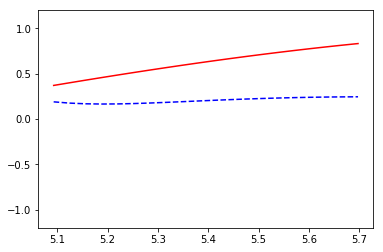

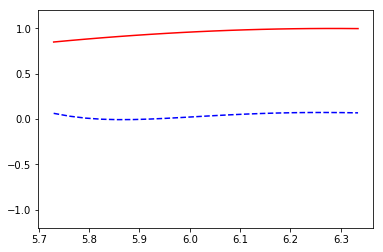

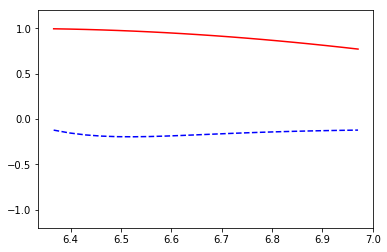

train cost:  0.3842911


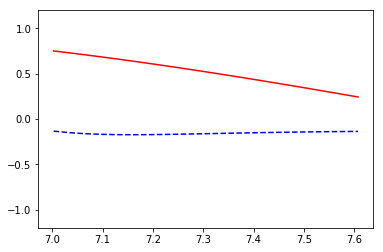

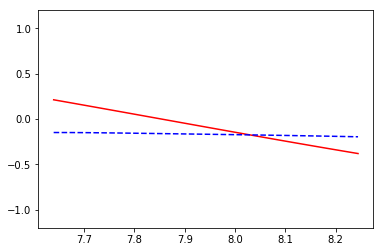

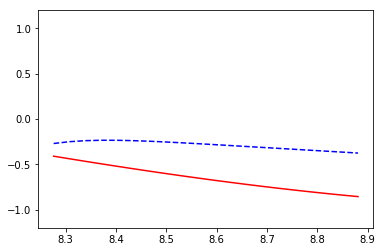

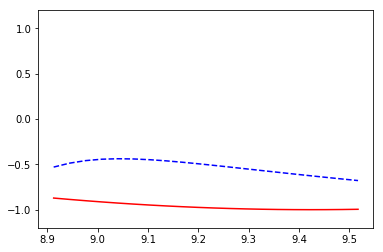

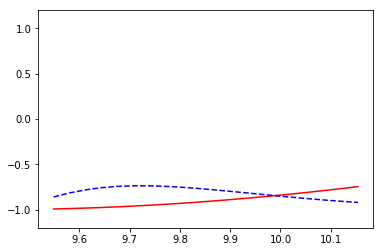

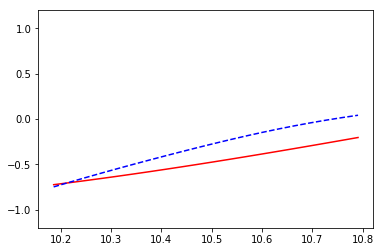

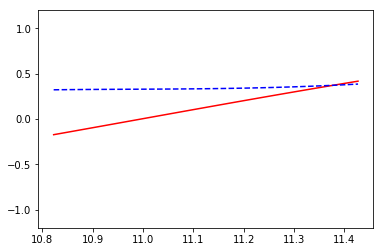

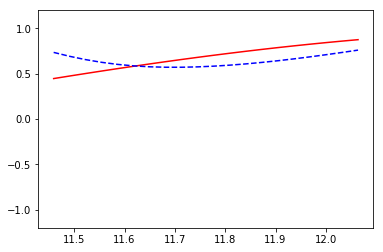

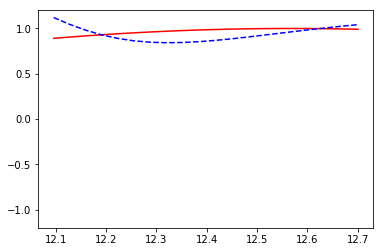

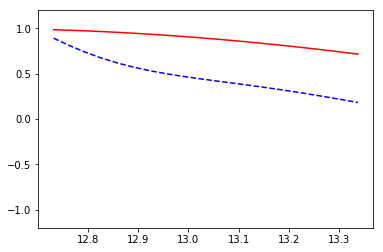

train cost:  0.05569892


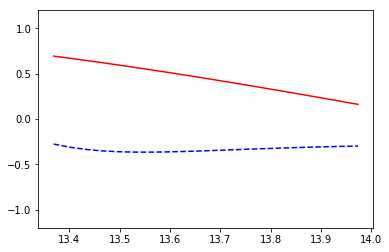

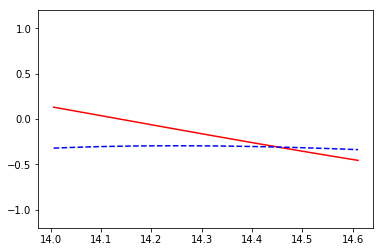

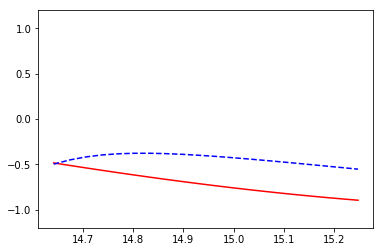

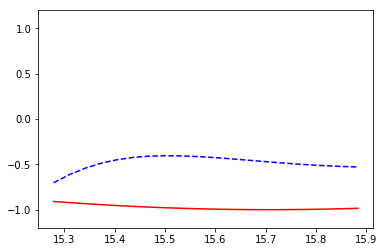

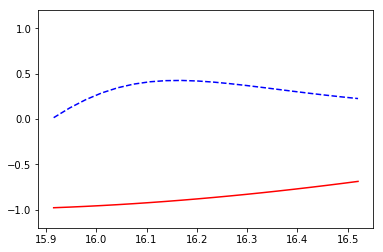

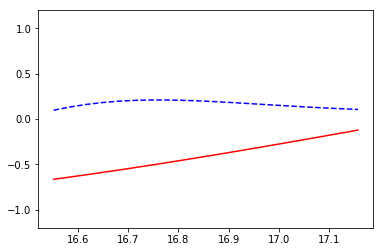

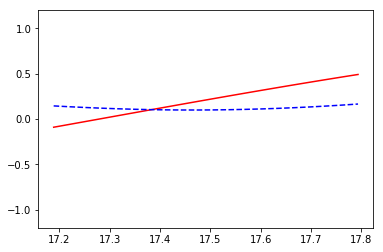

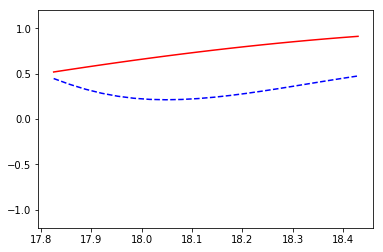

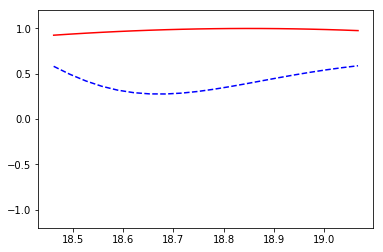

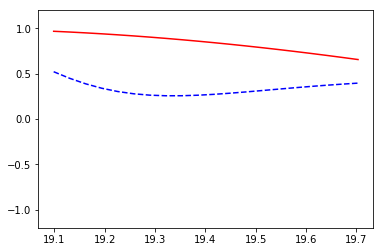

train cost:  0.10607986


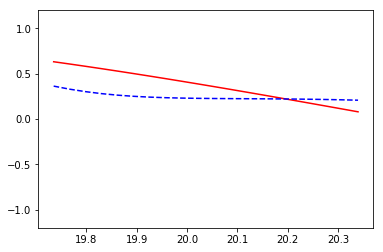

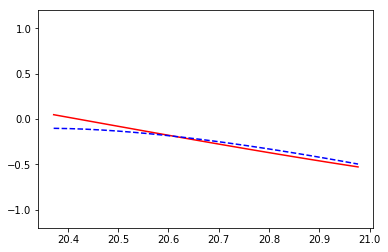

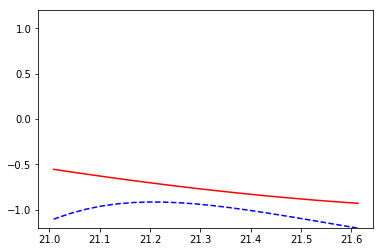

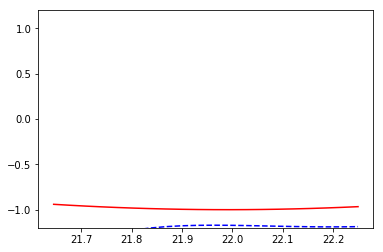

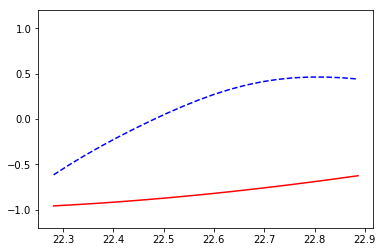

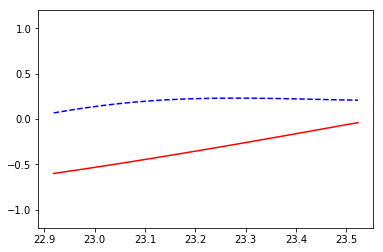

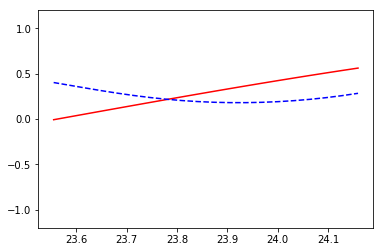

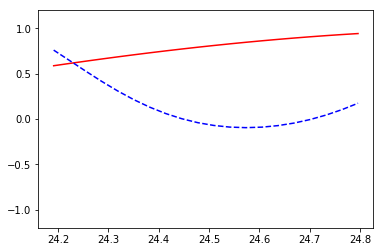

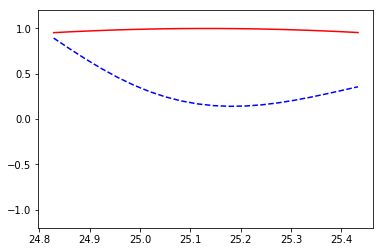

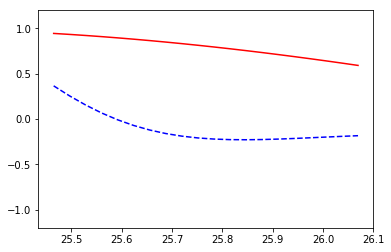

train cost:  0.19580278


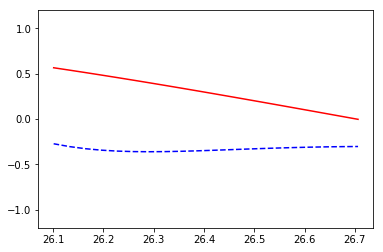

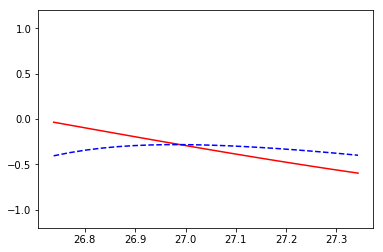

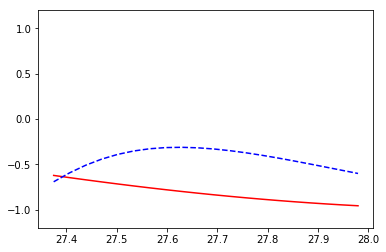

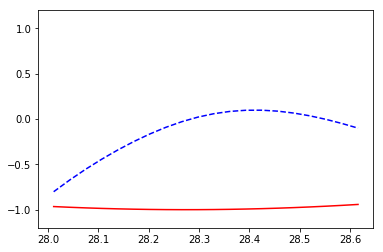

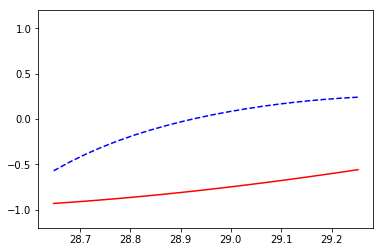

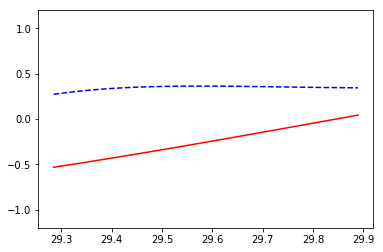

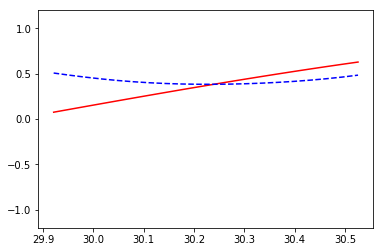

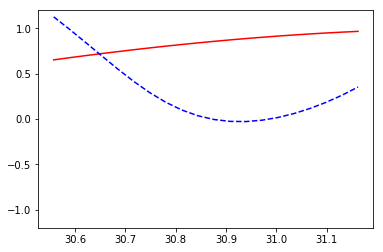

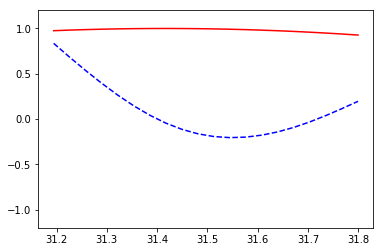

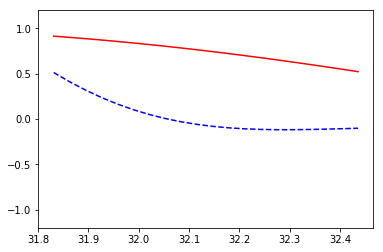

train cost:  0.092749506


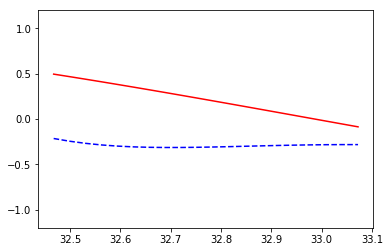

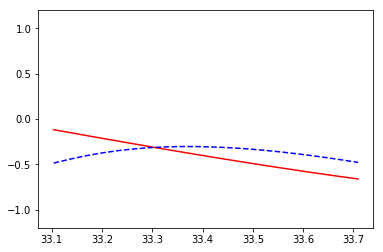

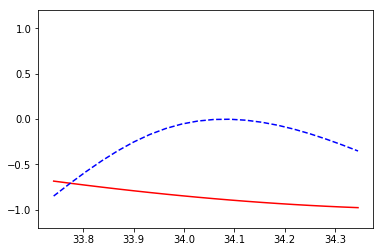

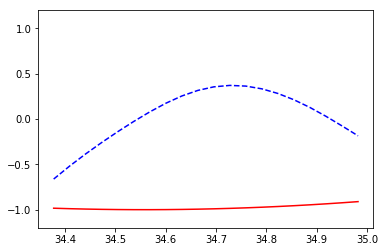

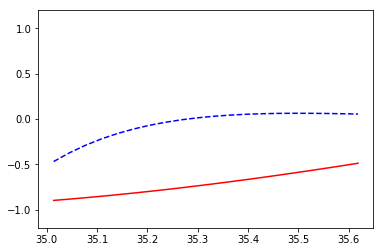

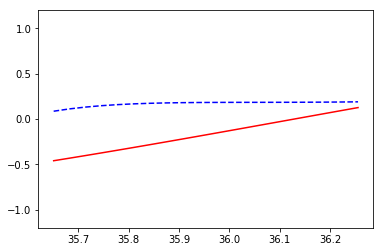

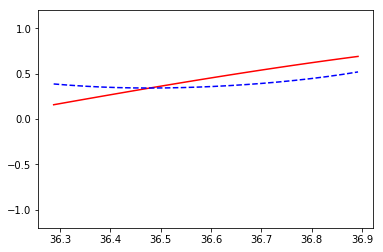

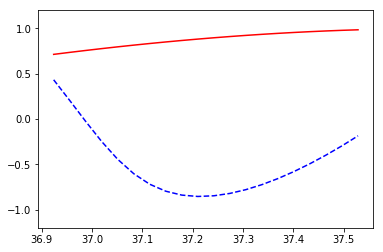

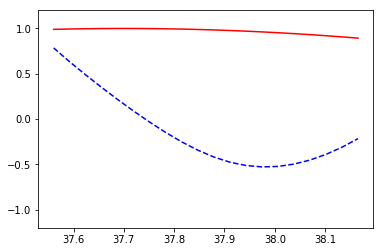

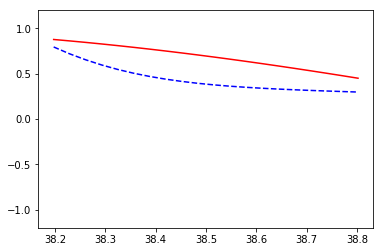

train cost:  0.097900935


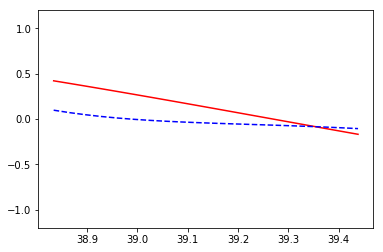

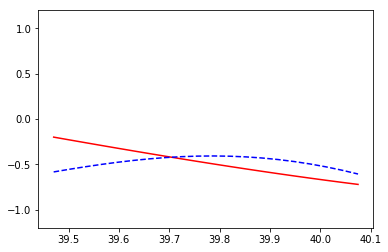

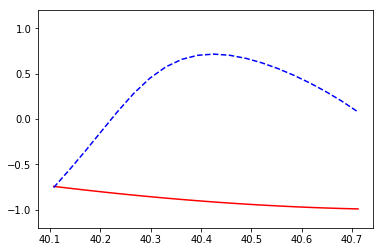

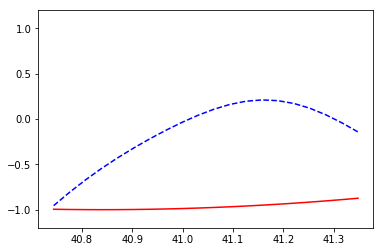

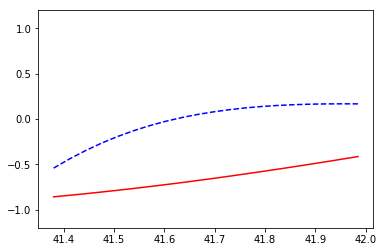

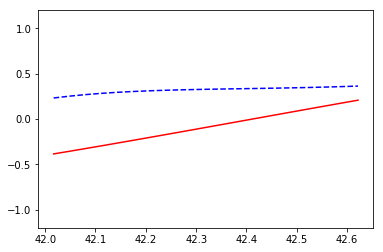

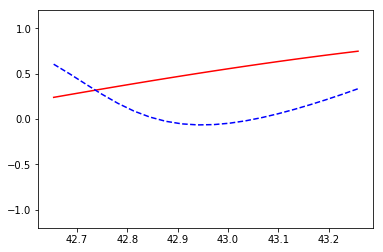

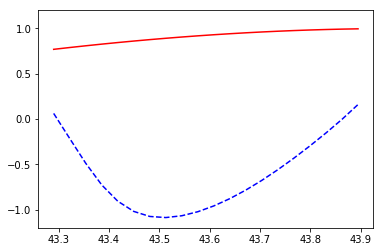

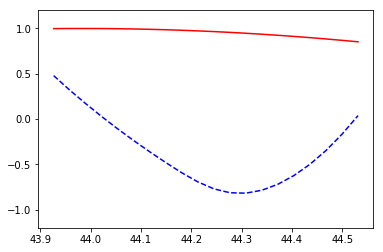

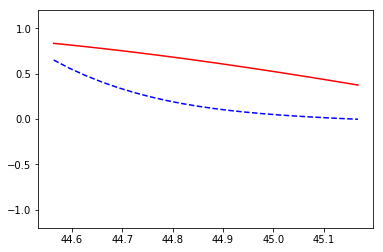

train cost:  0.088915184


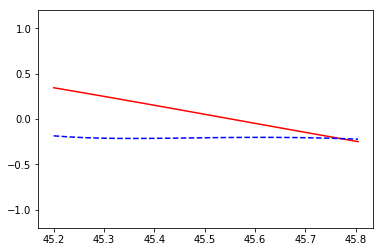

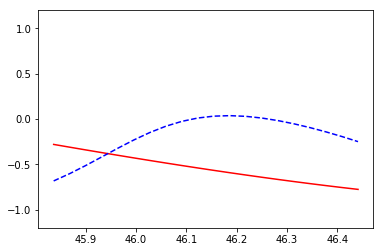

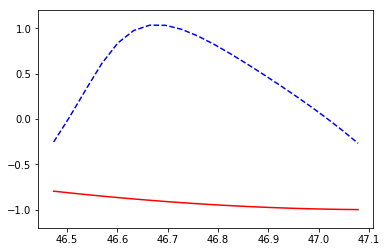

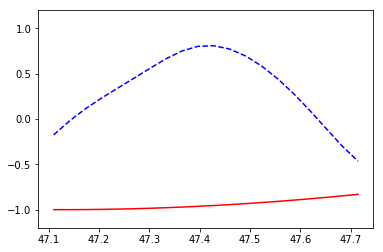

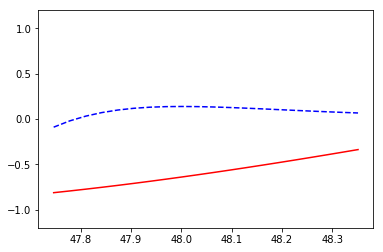

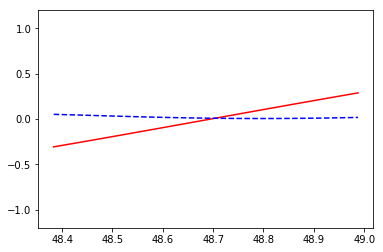

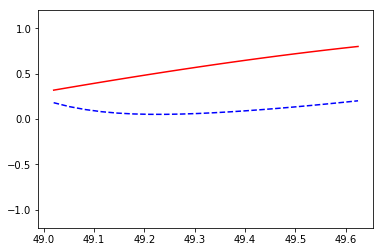

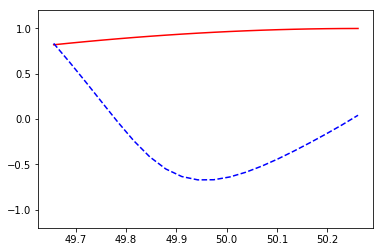

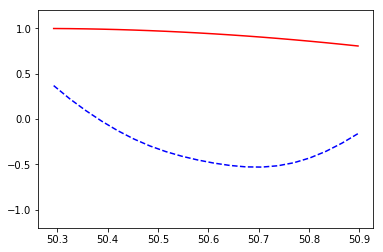

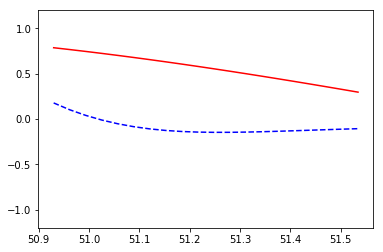

train cost:  0.09381656


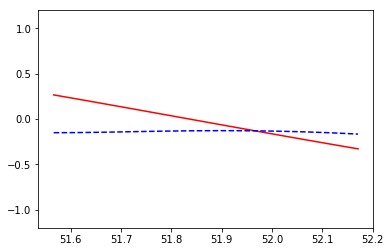

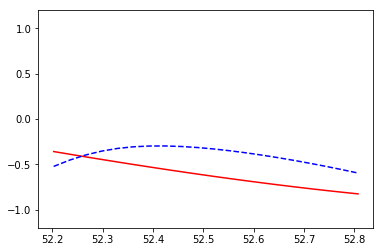

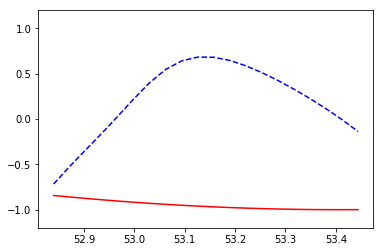

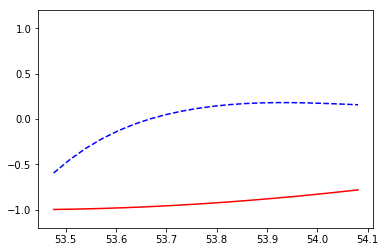

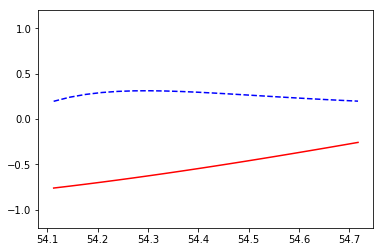

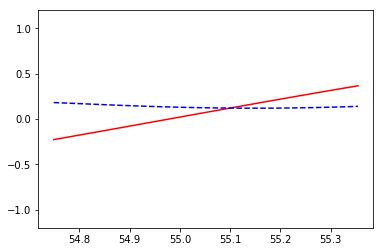

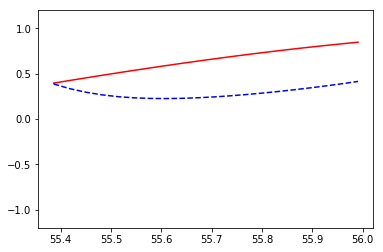

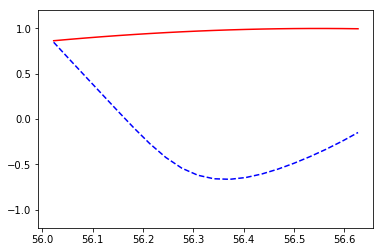

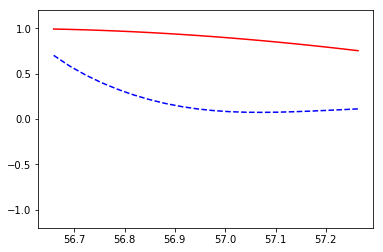

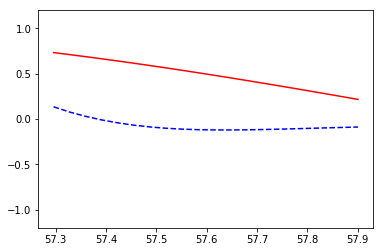

train cost:  0.06368393


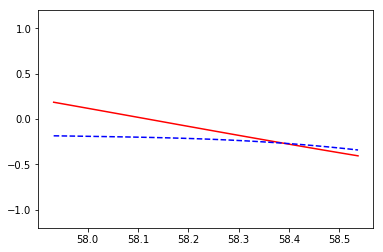

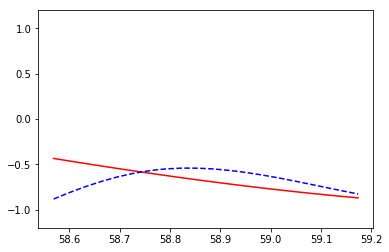

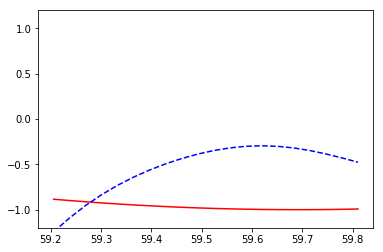

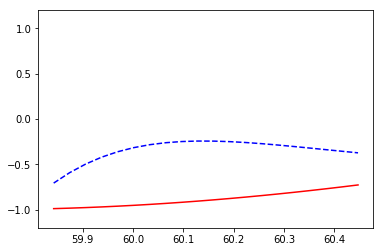

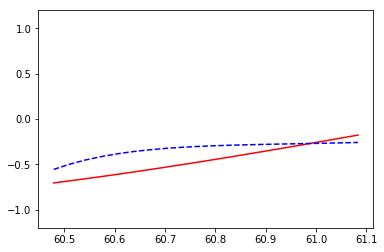

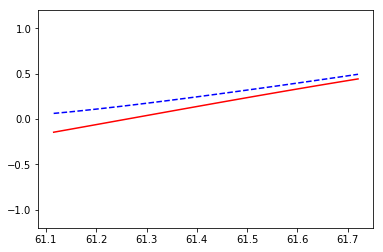

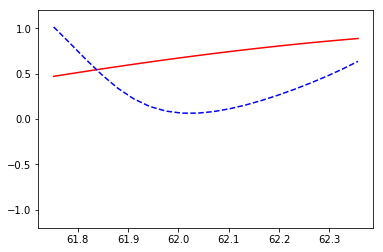

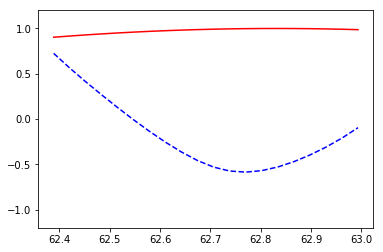

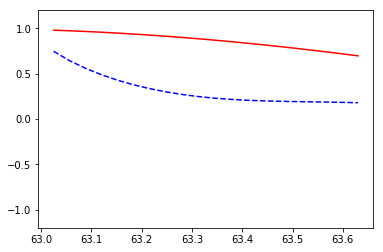

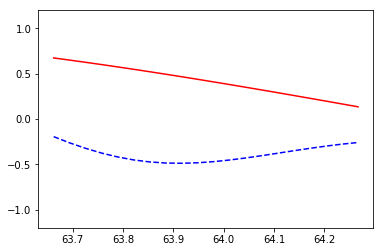

train cost:  0.060325813


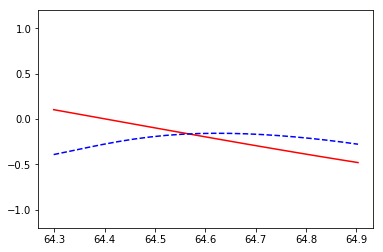

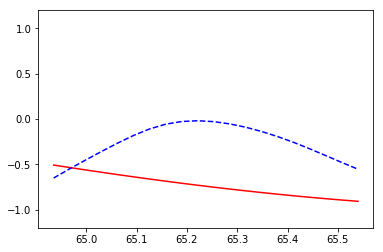

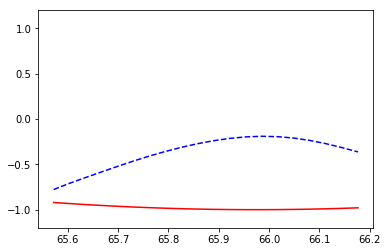

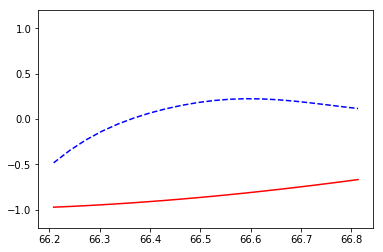

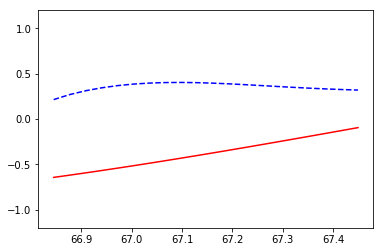

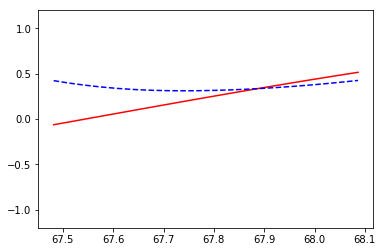

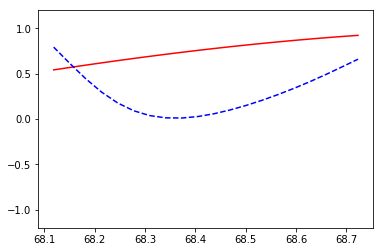

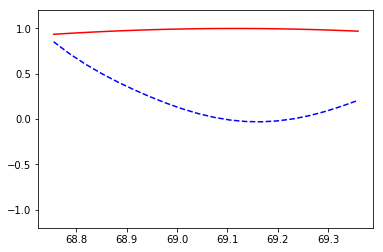

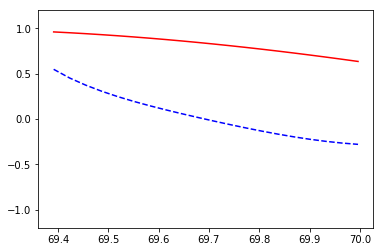

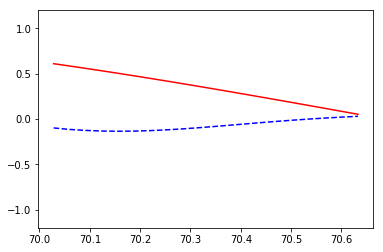

train cost:  0.06221247


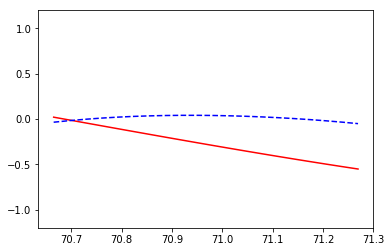

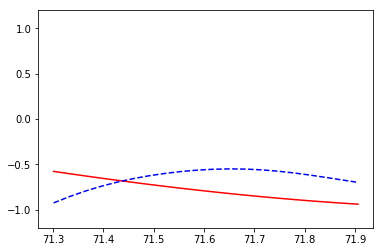

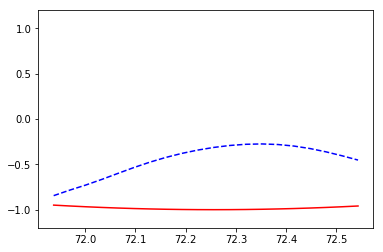

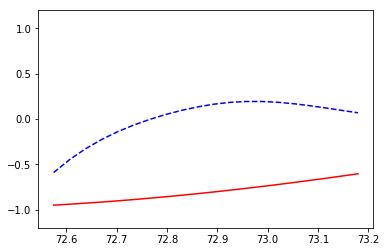

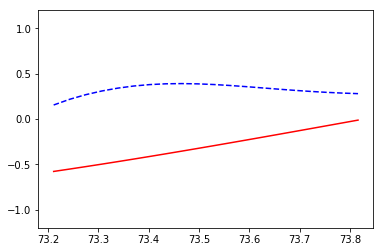

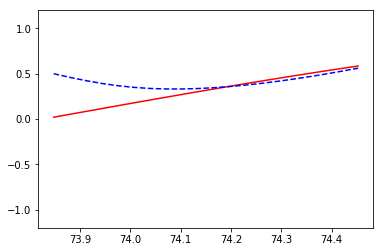

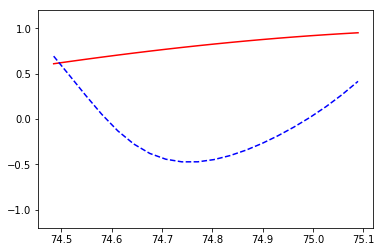

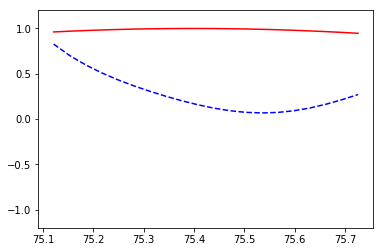

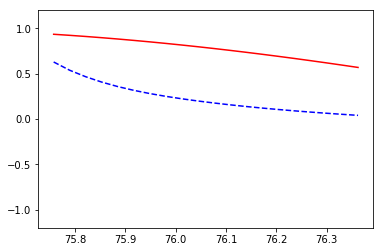

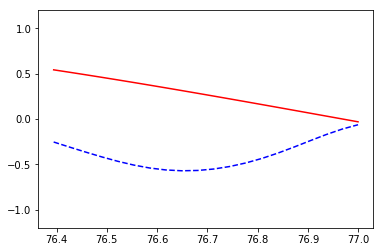

train cost:  0.07623089


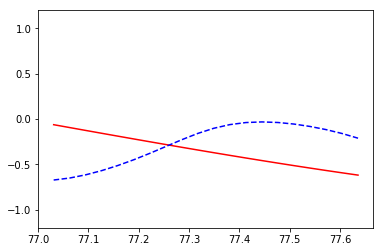

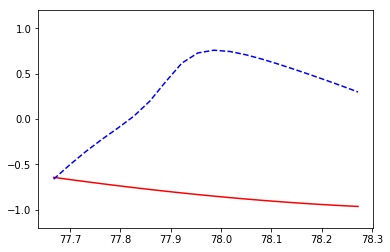

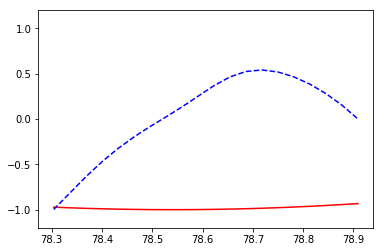

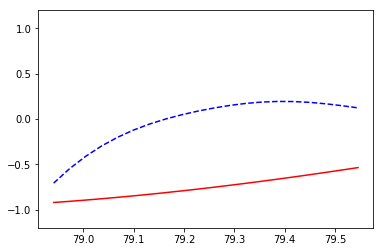

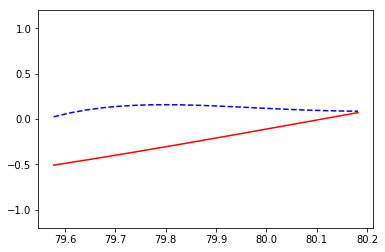

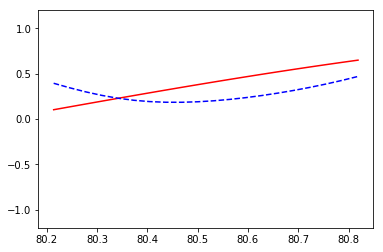

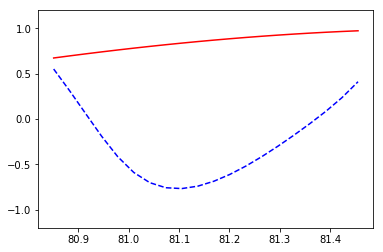

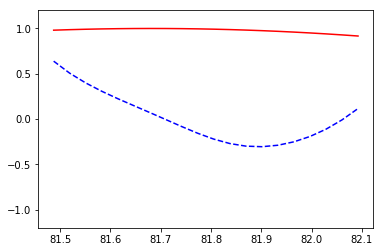

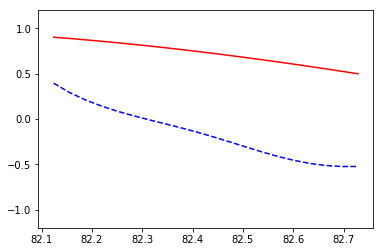

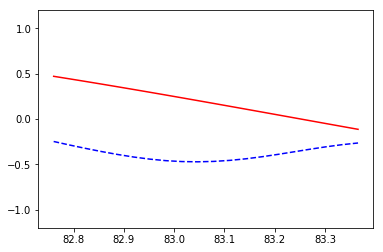

train cost:  0.08066511


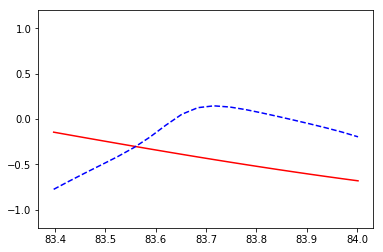

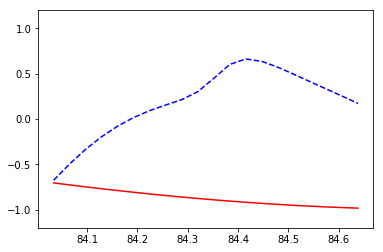

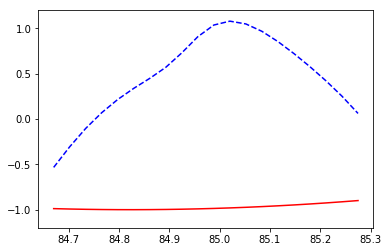

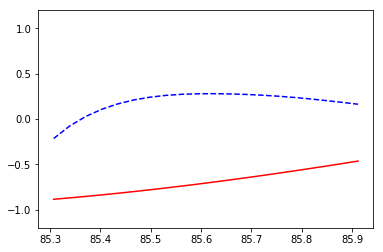

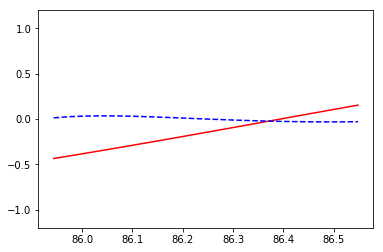

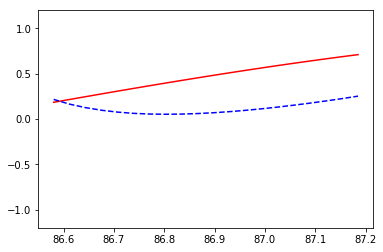

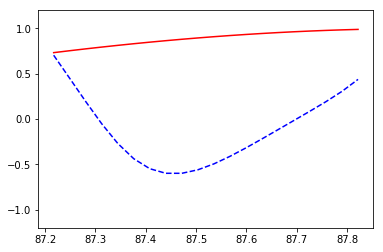

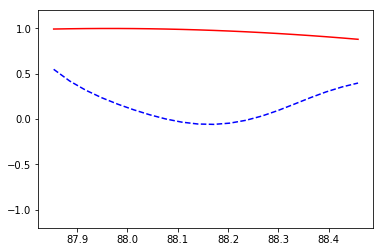

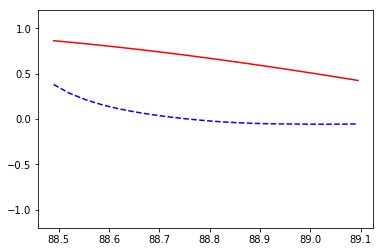

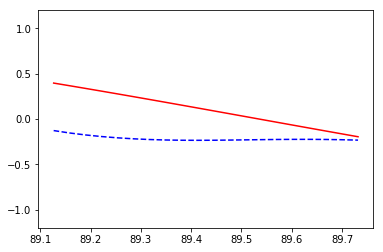

train cost:  0.044961147


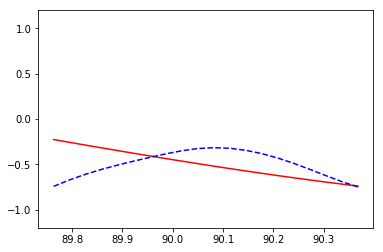

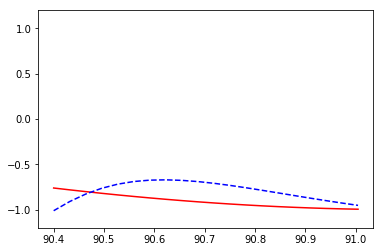

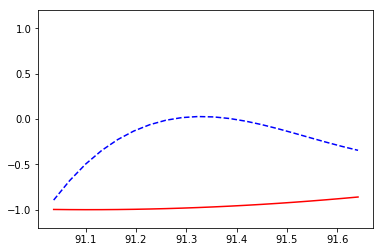

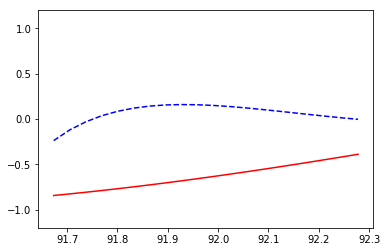

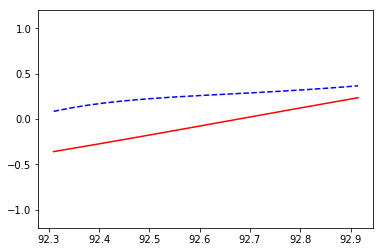

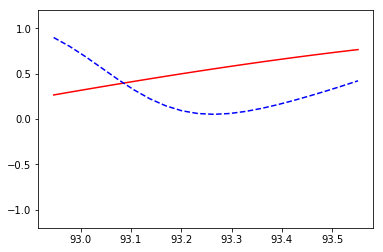

KeyboardInterrupt: 

In [3]:
print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)